In [22]:
## First, Let's import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing
import pandas_profiling as pp
plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [23]:
## Next let's  load in the profiles data into a pandas Dataframe (df)
df = pd.read_csv('profiles.csv')

In [24]:
## Now let's do some exploratory analysis to better understand the dataset, and formulate our questions
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [25]:
## What are the columns?
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [26]:
## What are the dtypes of each column?
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

In [27]:
## How many rows, columns in the data?
df.shape

(59946, 31)

In [29]:
## Summary statistics of our quantitative variables
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [30]:
##  What unique values are within the columns of our dataset?
for i in df.columns:
    print(df[i].value_counts())

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
mostly any

In [ ]:
## Create aa pandas profiling report, for fun and efficient EDA.
pp.ProfileReport(df)

In [31]:
## Let's clean up some of the variables we're working with. Religion and Sign have a lot of noise.
df['cleaned_sign'] = df.sign.str.split().str.get(0)
print("num of signs:",df.cleaned_sign.nunique())
print("signs:",df.cleaned_sign.unique())

df['cleaned_religion'] = df.religion.str.split().str.get(0)
print("num of religions:",df.cleaned_religion.nunique())
print("religions:",df.cleaned_religion.unique())


num of signs: 12
signs: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
num of religions: 9
religions: ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']


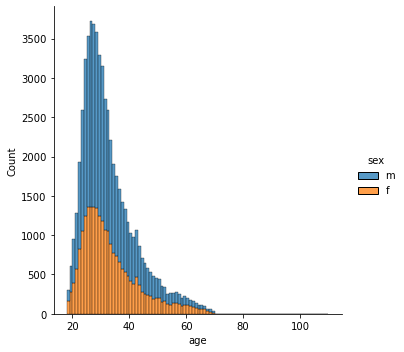

In [32]:
## Let's graph all of our variables
sns.displot(data=df, x="age", kind="hist", binwidth = 1, hue='sex', multiple='stack')

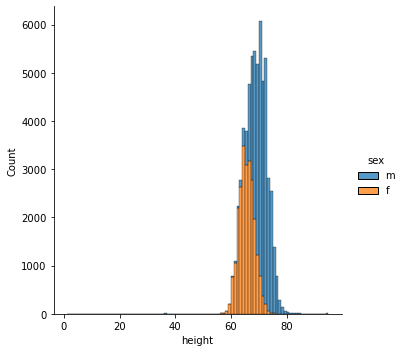

In [33]:
sns.displot(data=df, x="height", kind="hist", binwidth = 1, hue='sex', multiple='stack')

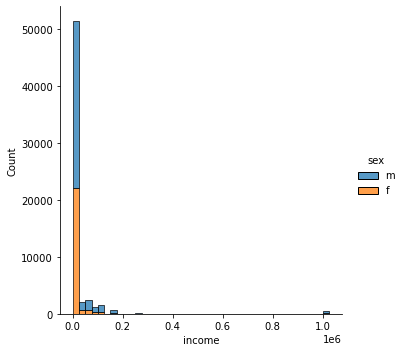

In [35]:
sns.displot(data=df, x="income", kind="hist", binwidth = 25000, hue='sex', multiple='stack')

<AxesSubplot:xlabel='count', ylabel='sex'>

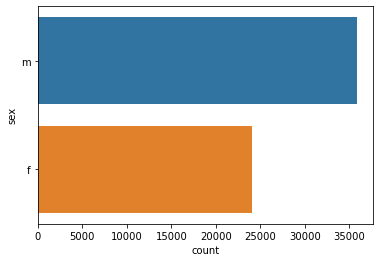

In [40]:
sns.countplot(y=df.sex)

<AxesSubplot:xlabel='count', ylabel='body_type'>

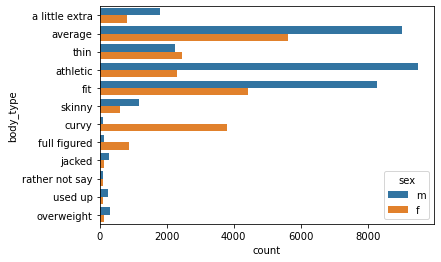

In [47]:
sns.countplot(y=df.body_type, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='diet'>

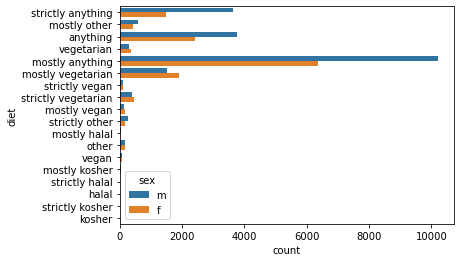

In [48]:
sns.countplot(y=df.diet, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='drinks'>

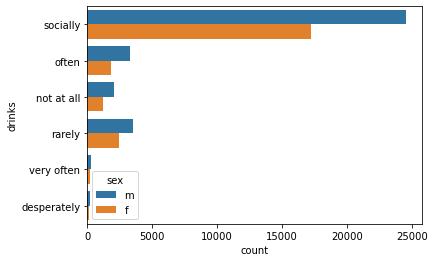

In [49]:
sns.countplot(y=df.drinks, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='drugs'>

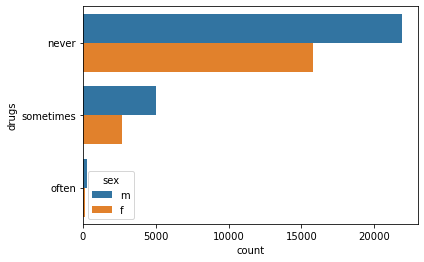

In [50]:
sns.countplot(y=df.drugs, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='education'>

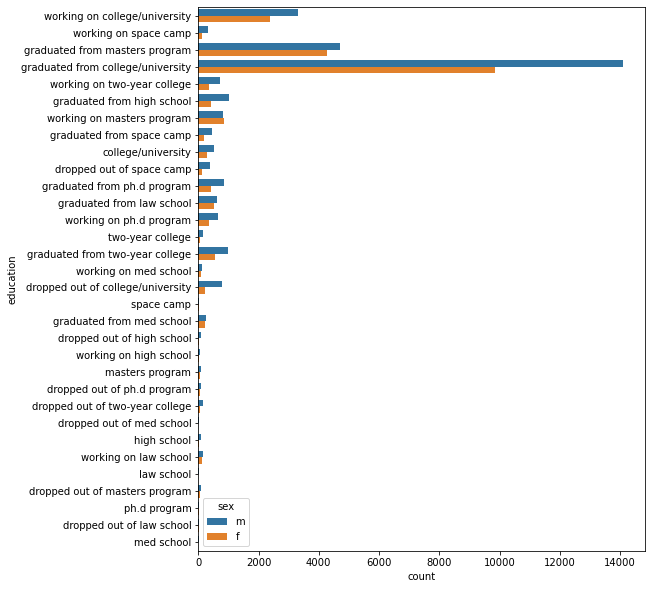

In [52]:
plt.figure(figsize=(8,10))
sns.countplot(y=df.education,  hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='job'>

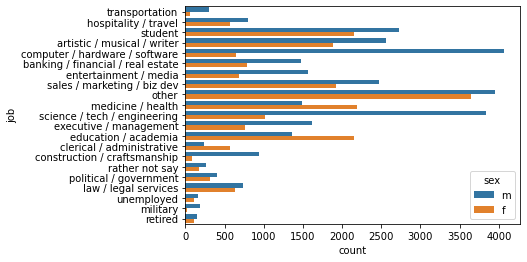

In [54]:
sns.countplot(y=df.job, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='offspring'>

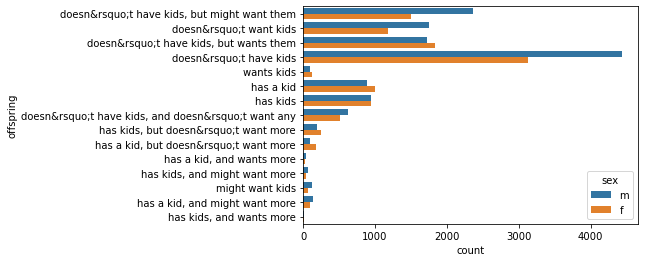

In [56]:
sns.countplot(y=df.offspring, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='orientation'>

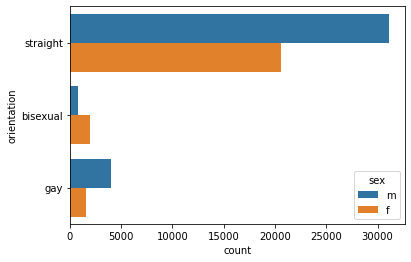

In [57]:
sns.countplot(y=df.orientation, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='pets'>

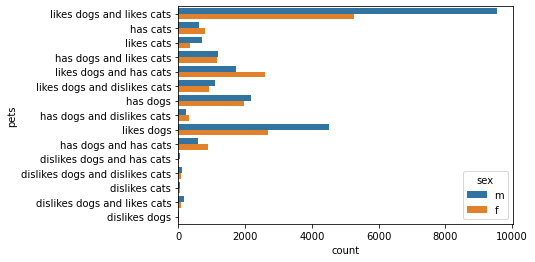

In [58]:
sns.countplot(y=df.pets,hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='cleaned_religion'>

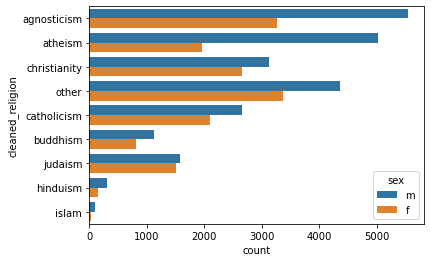

In [60]:
sns.countplot(y=df.cleaned_religion, hue=df.sex)b

<AxesSubplot:xlabel='count', ylabel='cleaned_sign'>

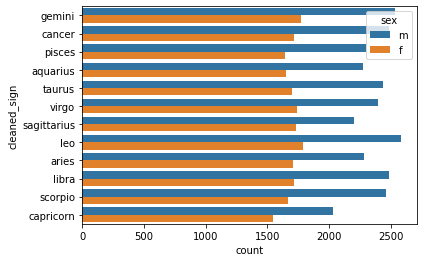

In [61]:
sns.countplot(y=df.cleaned_sign, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='smokes'>

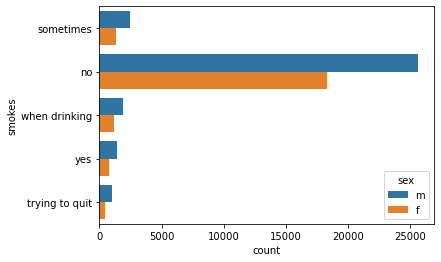

In [62]:
sns.countplot(y=df.smokes, hue=df.sex)

<AxesSubplot:xlabel='count', ylabel='status'>

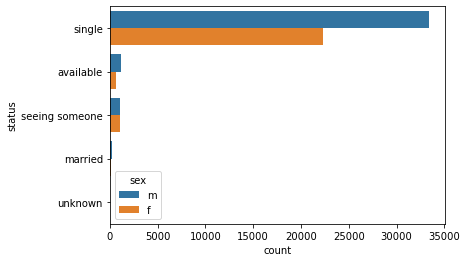

In [64]:
sns.countplot(y=df.status, hue=df.sex)

In [ ]:
# Empty values in each column
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [ ]:
## Let's normalize our quantitative variables, to make them easier to use in modelling, and comparative analysis.
x = df[['age', 'income', 'height']]
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normed_df = pd.DataFrame(x_scaled, columns=['age', 'income', 'height'])
df[['age', 'income', 'height']] = normed_df


In [ ]:
normed_df.describe()

In [ ]:
df.describe()

In [ ]:
## Plot our quantitative variables against one another to get a sense for distribution, any correlations
sns.pairplot(normed_df)

In [ ]:
## Ensure our normalized values make sense
print(df.income.head())
print(df.age.head())
print(df.height.head())